In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Halaarav/Some-Projects/main/insurance_data.csv')


## __Need for this study__

> We had been posed with an Insurance dataset consisting of Cross-Sectional Data.
 Intuitively, A proper (regression) analysis of the given problem would help the NBFC or bank by prediction of the insurance claim to cut it’s losses, manage current policies or introduce new policies concerning Insurance, 
But as we ruffled the feathers of the problem , we realized the data to have a variety of attributes of different types which may or may not have a role to play in our quest to predict the insurance claim. Their relation not only individually but also as groups of two or more with the ‘Insurance Claim Amount’ would have an impact on the final decisions to be made by the bank.

### This problem posed an opportunity to first fix the flaws and then ultimately make this data ‘useful’.



In [5]:
data.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [6]:
data_ins = data.copy()
data_ins

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [7]:
data1 = data.copy()

## Taking suitable measures to treat the  missing values:

There were a total of 5 missing numerical values under attribute __'age'__ ,

and 3 missing categorical values under attribute __'region'__.

In [8]:
data_ins.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

> Replacing the missing values under 'age' with the __mean__ of all the cases under 'Age'

In [9]:
data_ins["age"].fillna(data_ins.age.mean(), inplace = True) 

> Replacing null values of 'region' with the __mode__ of the all the cases under 'region'.
i.e. region = southeast

In [10]:
data_ins.region.mode()

0    southeast
dtype: object

In [11]:
data_ins = data_ins.fillna(data_ins.region.mode()[0])

In [12]:
data_ins.isnull().sum() # All the null values are now removed and the data is cleaned. 

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

## Dividing the variables of the given dataset broadly as Categorical and Numerical.

> Categorical Variables

In [13]:
Categorical = []
for columns in data:
        if (data.dtypes[columns] == 'object'):
            Categorical.append(columns)
Categorical

['gender', 'diabetic', 'smoker', 'region']

> Numerical Variables

In [14]:
Numerical = []
for columns in data:
    if (data.dtypes[columns] == 'float64') or (data.dtypes[columns] == 'int64'):
         Numerical.append(columns)
Numerical

['PatientID', 'age', 'bmi', 'bloodpressure', 'children', 'claim']

***Graphs for Numerical data***

***Graph for Continuous data***



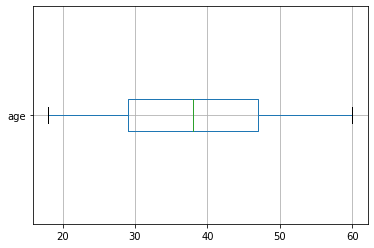

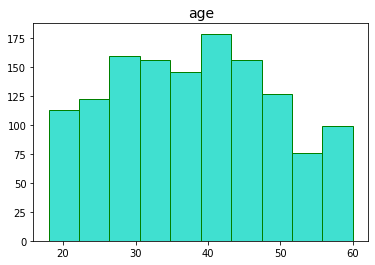

***Graph for Continuous data***



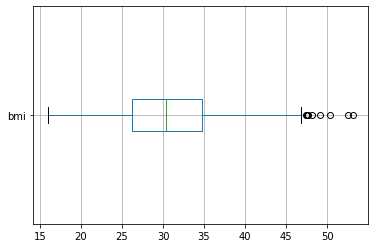

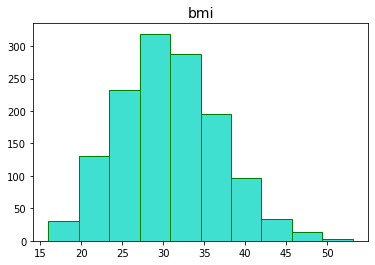

***Graph for Continuous data***



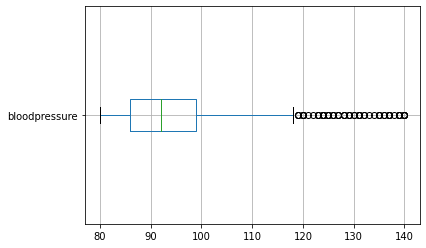

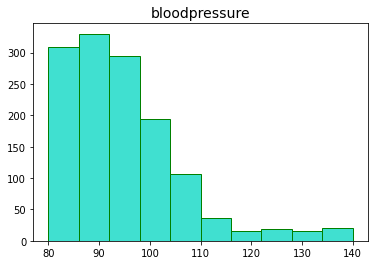

***Graph for Discrete data***



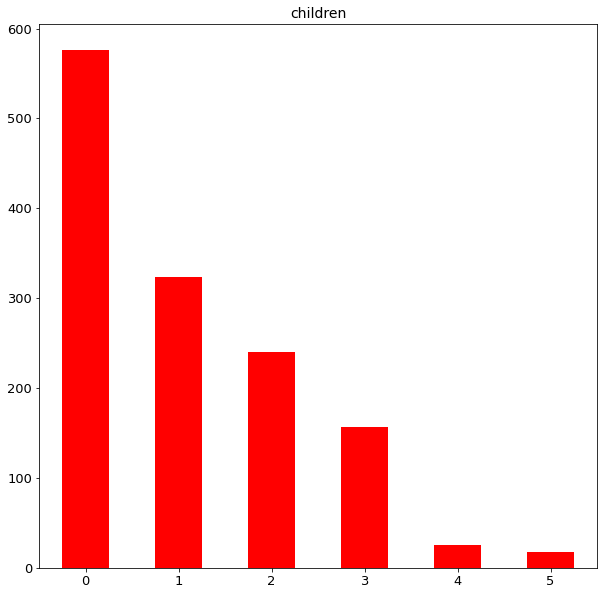

***Graph for Continuous data***



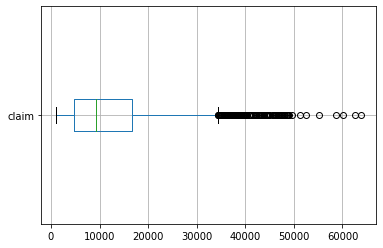

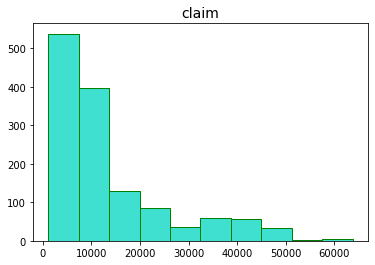

In [15]:
def Graph_v2_numerical(file_name):
    print ("***Graphs for Numerical data***\n")
    Numerical.remove('PatientID')
    for i in Numerical:
            if len(data[i].value_counts())>10:
                print ("***Graph for Continuous data***\n")
                data.boxplot(column = i,grid = True,figsize = (6,4),vert = False)  
                data.hist(column = i,grid = False,figsize = (6,4),color = "turquoise",edgecolor = "green")
                plt.title(i, fontsize = 14),
                plt.show()
            else:
                print ("***Graph for Discrete data***\n")
                data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (10,10),color = "red",fontsize = 13)
                plt.title(i, fontsize = 14),
                plt.show()        
Graph_v2_numerical("insurance_data.csv")

> Age

In [16]:
data_ins.age.describe()

count    1340.000000
mean       38.078652
std        11.082175
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [17]:
data_ins.age.quantile(0.95)

57.0

Clearly we can see that there are age groups ranging from 18 years to 60 years.
Also, 95% of the people have an age less than or equal to 57.

> BMI

In [18]:
data_ins.bmi.describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

According to the National Heart, Lung and Blood Institute, USA
(https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm)

Less than 18.5 is termed underweight.

In a range of 18.5–24.9 is termed as Normal.

Over 24.9 to 30 considered overweight.

Anything above 30 is categorised as obese.

Intuitively, we will be categorising bmi as 'Normal'(i.e. in range 18.5 - 24.9) 
and all others as 'Not Normal'.

This may be used during the bivariate analysis of 'BMI' with the 'Claim'. 


***Graphs for Categorical data***



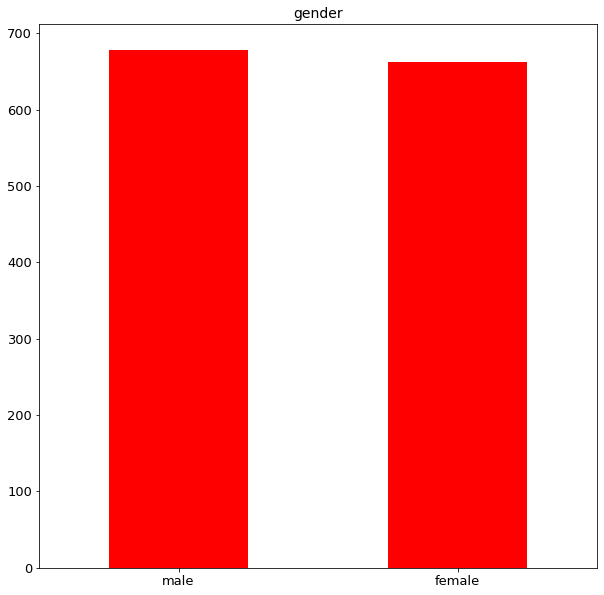

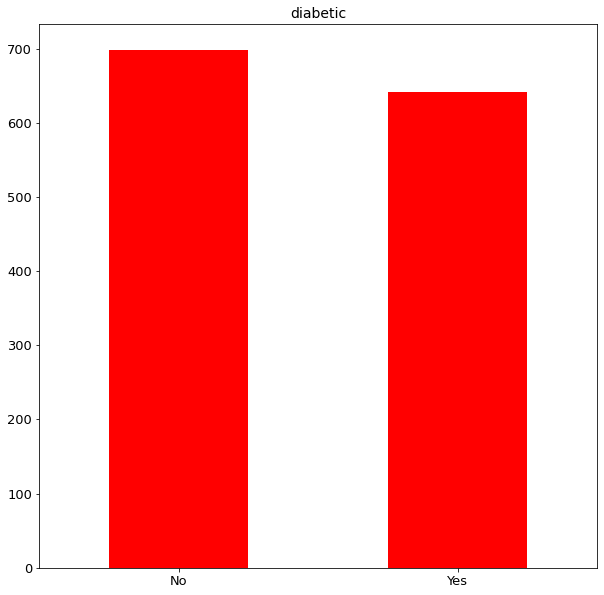

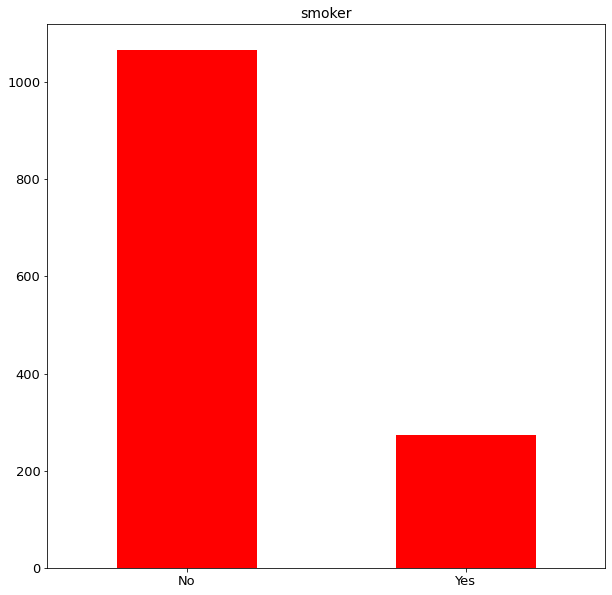

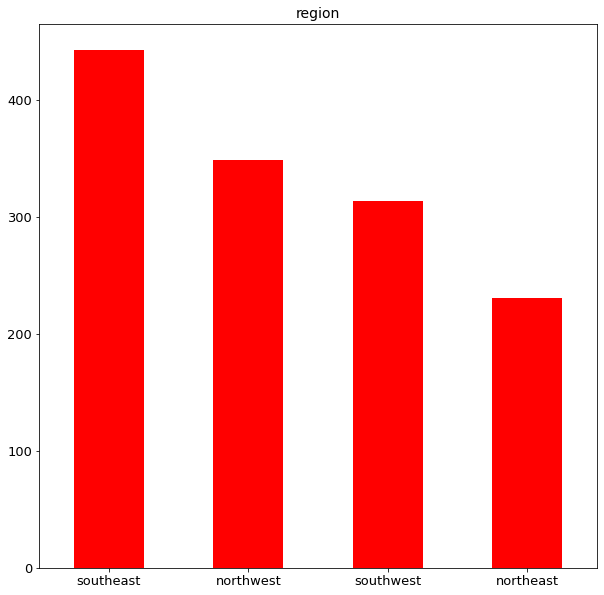

In [19]:
def Graph_v2_Categorical(filename):
    
    print ("\n***Graphs for Categorical data***\n")
    for i in Categorical or len(data[i].value_counts())<10:
        data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (10,10),color = "red",fontsize = 13)
        plt.title(i, fontsize = 14),
        plt.show()
Graph_v2_Categorical("insurance_data.csv")

In [20]:
gender=pd.crosstab(data_ins.gender,columns="Count")
gender

col_0,Count
gender,
female,662
male,678


In [21]:
value_gender=[662,678]
label_gender=["Female","Male"]

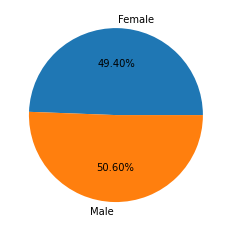

In [22]:
plt.pie(value_gender,labels=label_gender,autopct="%0.2f%%")
plt.show()

Clearly, we can see that each gender has an almost equal representation.
Treating Gender as a nominal variable, we will be encoding male as '0' and female as '1'.

## BIVARIATE ANALYSIS

### BMI and Claim

Text(0, 0.5, 'Claim')

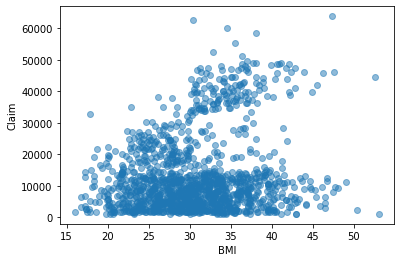

In [23]:
plt.scatter(data_ins.bmi,data_ins.claim, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Claim')

The visual above brings us to the claim below:

    Claim 1: The average claim of a person with normal BMI is
         less than the avg. claim of a person with abnormal BMI.

H1: The average claim of a person with normal BMI is
     less than the avg. claim of a person with abnormal BMI.

H0: The average claim of a person with normal BMI is
     equal to or greater than avg. claim of a person with abnormal BMI.
     
Testing the claim at a significance level of 0.05

The test would be a left-tailed test.

In [24]:
t_crit = stats.t.ppf(0.05,1340-2)#Calculating the critical value
t_crit

-1.6459932615808077

X1 = People with normal BMI

X2 = People with abnormal BMI(i.e. underweight, overweight, obese)


In [25]:
X1 = data_ins.loc[(data_ins["bmi"] >= 18.5) & (data_ins["bmi"] <= 24.9)]
X1

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
10,11,36.0,male,19.8,88,Yes,0,No,northwest,1241.57
11,12,37.0,male,20.3,90,Yes,0,No,northwest,1242.26
12,13,19.0,male,20.7,81,No,0,No,northwest,1242.82
20,21,45.0,male,23.2,85,Yes,0,No,southeast,1515.34
...,...,...,...,...,...,...,...,...,...,...
1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1157,1158,30.0,female,24.9,91,Yes,0,No,southeast,27117.99
1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1179,1180,19.0,male,24.7,97,Yes,1,No,northwest,30166.62


In [26]:
X2 = data_ins.loc[(data_ins["bmi"] < 18.5) | (data_ins["bmi"] > 24.9)]
X2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01
5,6,38.078652,male,34.4,96,Yes,0,No,northwest,1137.47
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.000000,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.000000,male,30.4,106,No,0,Yes,southeast,62592.87


In [27]:
var1 = X1.claim.var()
var2 = X2.claim.var()
var1,var2

(56344733.1811858, 162703610.31514734)

The variance has a huge value which may be make the calculations complex.
So we must keep in mind that we can do a log-transform of the claim later as along with making calculation easier it can help deal with the outliers that exist within claim itself.

In [28]:
t_stat = (X1.claim.mean() - X2.claim.mean())/np.sqrt((var1/223)+(var2/1117))
t_stat

-5.535340885844434

In [29]:
stats.t.cdf(t_stat,1340-2)

1.86678477284563e-08

Since the t-statistic value is less than the critical value, hence our null hypothesis can be rejected.

Hence, we can proceed with the claim, that the average insurance claim of people with 
normal bmi is less than the average insurance claim of people with abnormal bmi.
This may be used later in feature engineering.

### Region and Claim

In [30]:
data_ins.region.unique() #Checking for the unique values of region

array(['southeast', 'northwest', 'southwest', 'northeast'], dtype=object)

In [31]:
data_ins.claim

0        1121.87
1        1131.51
2        1135.94
3        1136.40
4        1137.01
          ...   
1335    55135.40
1336    58571.07
1337    60021.40
1338    62592.87
1339    63770.43
Name: claim, Length: 1340, dtype: float64

Plotting a visual representation of the mean claim amounts of each region:

In [32]:
means = []
southeast_mean = np.asarray(data_ins[data_ins["region"]=='southeast'].claim).mean()
northeast_mean = np.asarray(data_ins[data_ins["region"]=='northeast'].claim).mean()
northwest_mean = np.asarray(data_ins[data_ins["region"]=='northwest'].claim).mean()
southwest_mean = np.asarray(data_ins[data_ins["region"]=='southwest'].claim).mean()
means.append(southeast_mean),means.append(northeast_mean),means.append(northwest_mean),means.append(southwest_mean)
means

[12979.121502242155,
 16889.044718614718,
 11672.088452722064,
 12723.129840764333]

In [33]:
region = ['southeast','northeast','northwest','southwest']

<BarContainer object of 4 artists>

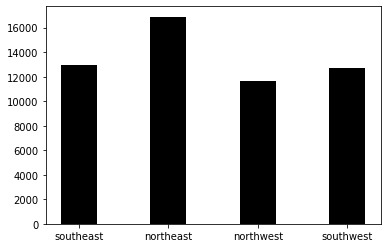

In [34]:
plt.bar(region, means, color ='black', width = 0.4)

To once confirm the visual above, we needed to test the claim that:

    Claim 2: The average insurance claim amount does not depend on the region.

H1: The average insurance claim amount is different across different regions.
    
H0: The average insurance claim is same for all regions.

Testing the claim at a significance level = 0.05

This will be a right-tailed test

Applying one-way Annova:

In [35]:
southeast = np.asarray(data_ins[data_ins["region"]=='southeast'].claim)
northeast = np.asarray(data_ins[data_ins["region"]=='northeast'].claim)
northwest = np.asarray(data_ins[data_ins["region"]=='northwest'].claim)
southwest = np.asarray(data_ins[data_ins["region"]=='southwest'].claim)

In [36]:
southeast.mean(),northeast.mean()


(12979.121502242155, 16889.044718614718)

In [37]:
stats.f_oneway(southeast,northeast,northwest,southwest)

F_onewayResult(statistic=9.373845345028654, pvalue=3.923910319360799e-06)

Since p-value is less than 0.05, we can reject the Null Hypothesis.
Hence we can say that there is sufficient evidence to suggest that there exists a difference in the average claims across different regions.

__Using Tukey's test to determine exactly which group means are different:__

In [38]:
tukey = pairwise_tukeyhsd(endog=data_ins['claim'], groups=data_ins['region'], alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
northeast northwest -5216.9563  0.001 -7834.5825 -2599.3301   True
northeast southeast -3909.9232  0.001 -6411.6118 -1408.2346   True
northeast southwest -4165.9149  0.001 -6841.0133 -1490.8164   True
northwest southeast   1307.033 0.4246  -898.5111  3512.5772  False
northwest southwest  1051.0414 0.6531 -1349.4025  3451.4853  False
southeast southwest  -255.9917    0.9 -2529.4494   2017.466  False
------------------------------------------------------------------


Clearly, the p-value is 0.001 i.e. less than 0.05 for the first 3 rows above,
So our null hypothesis can be rejected for these 
i.e. The average insurance claim amount is different across the respective pairs of regions

Hence we can say that there is a significant difference between the average claim amounts 
between Northeast and all other regions.
This may be used later during feature engineering.

## Gender and Claim

<BarContainer object of 1340 artists>

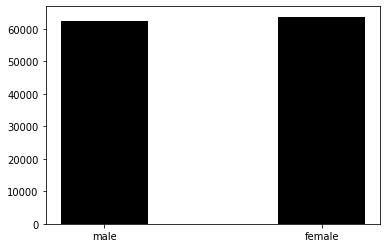

In [39]:
plt.bar(data_ins.gender, data_ins.claim, color ='black', width = 0.4)

There wasn't anything clear from the visual representation of the graph. But to be sure about 
whether gender affects the claim amount we would be trying a hypothesis test for the same.

    Claim: The average insurance claim amount of males is greater than that of females.

H1: The average insurance claim amount of males is greater than that of females.

H0: The average insurance claim amount of males is lesser than or equal to that of females.

Testing the claim at a significance level = 0.01

This will be a right-tailed test.

In [40]:
stats.t.isf(0.01,1340-2) #Critical value

2.329138122805607

In [41]:
X1 = data_ins.loc[data_ins["gender"] == 'male']
X1

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1332,1333,26.000000,male,37.0,120,No,2,Yes,southeast,49577.66
1333,1334,44.000000,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1335,43.000000,male,32.8,125,No,0,Yes,southwest,52590.83
1337,1338,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40


In [42]:
X2 = data_ins.loc[data_ins["gender"] == 'female']
X2

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
24,25,50.0,female,20.8,85,Yes,0,No,southeast,1607.51
26,27,36.0,female,26.7,97,Yes,0,No,southeast,1615.77
28,29,58.0,female,31.1,87,No,0,No,southeast,1621.88
29,30,35.0,female,31.4,93,No,0,No,southeast,1622.19
33,34,52.0,female,36.9,81,No,0,No,southeast,1629.83
...,...,...,...,...,...,...,...,...,...,...
1329,1330,52.0,female,37.7,109,Yes,0,Yes,southwest,48824.45
1330,1331,25.0,female,38.1,111,No,0,Yes,southeast,48885.14
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07


In [43]:
var_male = X1.claim.var()
var_female = X2.claim.var()
var_male,var_female

(168213130.18546784, 123848048.6390077)

In [44]:
t_stat =  (X1.claim.mean() - X2.claim.mean())/np.sqrt((var_male/678)+(var_female/662))
t_stat

2.0467535789675178

In [45]:
stats.t.sf(2.0467535789675115,1340-2)

0.020438659385190145

## Feature Engineering based on our initial Uni,Bi-Variate Analysis and subsequent Hypothesis testing

Implementing one-hot encoding

In [46]:
new_data = pd.get_dummies(data_ins, columns = ['gender','diabetic','smoker','region'])
new_data.head()

,PatientID,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,39.000000,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,2,24.000000,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
2,3,38.078652,33.3,82,0,1135.94,0,1,0,1,1,0,0,0,1,0
3,4,38.078652,33.7,80,0,1136.40,0,1,1,0,1,0,0,1,0,0
4,5,38.078652,34.1,100,0,1137.01,0,1,1,0,1,0,0,1,0,0


In [47]:
new_data

,PatientID,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,39.000000,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,2,24.000000,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
2,3,38.078652,33.3,82,0,1135.94,0,1,0,1,1,0,0,0,1,0
3,4,38.078652,33.7,80,0,1136.40,0,1,1,0,1,0,0,1,0,0
4,5,38.078652,34.1,100,0,1137.01,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,35.5,88,0,55135.40,1,0,0,1,0,1,0,1,0,0
1336,1337,59.000000,38.1,120,1,58571.07,1,0,1,0,0,1,1,0,0,0
1337,1338,30.000000,34.5,91,3,60021.40,0,1,0,1,0,1,0,1,0,0
1338,1339,37.000000,30.4,106,0,62592.87,0,1,1,0,0,1,0,0,1,0


## Model Fitting

> Linear Regression

In [48]:
X = new_data.drop(['claim','PatientID'],axis=1)
y = new_data.claim

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [50]:
lr = LinearRegression()

In [51]:
#Fitting the Linear Regression Model
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

Calculating MAPE(Mean Absolute Percentage Error):

In [53]:
np.mean(np.abs(y_test-y_pred)/y_test)*100

67.07545180293987

Calculate RMSE(Mean Squared Error):

In [79]:
from sklearn.metrics import mean_squared_error

In [77]:
np.sqrt(mean_squared_error(y_test,y_pred))

6876.626322244632

In [54]:
lr.score(X_train,y_train) #Training Score

0.7046390532367277

In [ ]:
lr.score(X_test,y_test)   #Testing Score

    It is evident from the training and the test score that the linear 
    regreesion model is underfitting the data. This can further be explained by 
    the poor performance of our model on the training data.

Intuitively, We shall try a decision tree model to increase the variance of the model so that the bias is also reduced as a trade-off 

> Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor #Importing the regressor

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(cv = 10, estimator = DecisionTreeRegressor(), n_jobs=-1,       #Permorming 10-fold cross validation
                    param_grid = {'criterion':['squared_error'],                   #Setting the parameters
                                  'max_depth': range(1,10),
                                  'min_samples_leaf' : range(1,5),
                                  'min_samples_split': range(1,10)},
                    verbose = 1)

In [59]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [60]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [66]:
#Fitting an optimised DT using the parameters we get from gridsearch CV
dt_optimised = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=4, min_samples_split=9)   
dt_optimised.fit(X_train,y_train)  
y_pred_optimised = dt_optimised.predict(X_test) 

In [67]:
dt_optimised.score(X_train,y_train) #Training Score

0.8228103463996773

In [68]:
dt_optimised.score(X_test,y_test)   #Test Score

0.8262224515636151

Calculating MAPE:

In [81]:
np.mean(np.abs(y_test-y_pred_optimised)/y_test)*100

62.419674534235405

The MAPE has also decreased

Calculating RMSE:

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred_optimised))

5307.3012390846725

The RMSE has decreased as compared to the Linear Regression Model which shows an improvement in the model performance

We can see that the accuracy has improved drastically.
There doesn't seem to be any sign of the model underfitting the data.

> Playing Around with AdaBoostRegressor:

In [69]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
base = DecisionTreeRegressor(max_depth = 6) #Trying for a more complex base classifier

In [103]:
boost_reg = AdaBoostRegressor(base)

In [104]:
boost_reg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6))

In [105]:
boost_reg.score(X_train,y_train)

0.8637044733356052

In [106]:
boost_reg.score(X_test,y_test)

0.801691097388241

In [107]:
y_pred_boosting = boost_reg.predict(X_test) 

In [108]:
np.sqrt(mean_squared_error(y_test,y_pred_boosting))

5669.542447564379

    There is no such drastic improvement in the model performance by using different variants of Adaptive Boosting Regressor

### CONCLUSION:
We used a linear regression model initially and observed a high bias as the learning rate was very low. So, intuitively, we fitted a decision tree model which has a higher variance and as a result we saw the improvement in the model performance.
Also, as an experiment, we have tried using the Adaptive Boosting Model which may increase the variance by assigning more weight to the wrong predictions.But we observed a constant trade-off between the bias and variance by using various base regressors.  